# Machine Learning with PyTorch and Scikit-Learn  
# -- Code Examples

# Problem 4

- Use attached Jupyter notebook ch18_part1.ipynb from chapter 18 of Machine Learning with PyTorch and Scikit-Learn by Sebastian Raschka et al., Packt Publishing, 2022.
- You are asked to follow the development in that notebook.
- Create six small graphs with 4,4,5, 6, and 6 nodes respectively.
- If you have any Chemistry training, assign different atoms to nodes in your graphs in some chemically meaningful manner.
- Possible atoms to use are C-carbon, O-Oxygen and N-Nitrogen. If you have no Chemistry training, just assign those letters to the nodes randomly.
- Do not use SMILES or the QM9 dataset presented in lecture. This is not meant to be that complicated, just an extension of the first example with colors.
- Develop a function that will create one-hot encoding for the identity of all atoms.
- Based on that function create node label matrices for all graphs. We treat the identity of every atom as the feature of that node.
- Generate adjacency matrices for all generated graphs.
- Instantiate simple Graph Convolutional Network model NodeNetwork as defined in the original notebook.
- Collate those graphs as a list into a single batch.
- As the target value (labels) `y` use 1 if a graph contains a Nitrogen and 0 if it does not.
- Our main objective is to organize those six graphs as a single torch.utils.data.Dataset and then pass that dataset to a loader of type torch.utils.data.DataLoader.
- When instantiating a  DataLoader use batch_size=2.
- Finally, you want to create a loop which will feed mini-batches from the loader into an instance of NodeNetwork.
- Please analyze the output of the forward pass through the network.
- You are not asked to train the network. You are demonstrating that you can feed a GNN with batches of graphs.

## graph 1 G1, 4 nodes ammonium

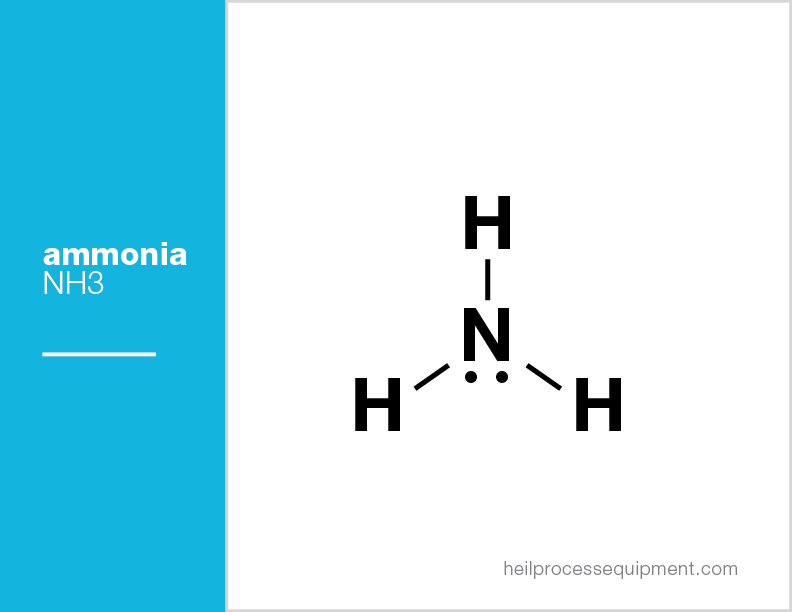

In [144]:
#create undirected graph and add nodes and edges
G1 = nx.Graph()

G1.add_nodes_from([(1, {"atom":"N"}),
                  (2, {"atom":"N"}),
                  (3, {"atom":"N"}),
                  (4, {"atom":"H"})])

G1.add_edges_from([(1, 4),(2, 4),(3, 4)])
A1 = np.asarray(nx.adjacency_matrix(G1).todense())
print(A1) #print adjacency matrix

[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [1 1 1 0]]


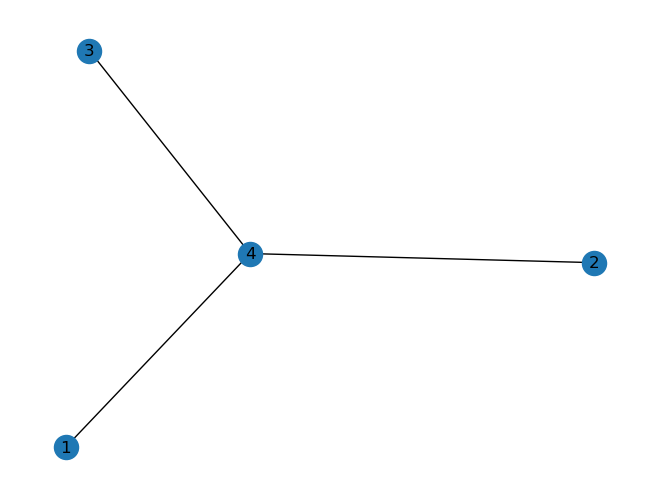

In [53]:
nx.draw(G1, with_labels=True)

In [30]:
mapping_dict = {"N": 0, "H": 1}

In [177]:
#generate one hot encoding of node colors
def build_graph_color_label_representation(G,mapping_dict):
    one_hot_idxs = np.array([mapping_dict[v] for v in 
                             nx.get_node_attributes(G, 'atom').values()])
    # print("one hot ids", one_hot_idxs);
    one_hot_encoding = np.zeros((one_hot_idxs.size,len(mapping_dict)))
    one_hot_encoding[np.arange(one_hot_idxs.size),one_hot_idxs] = 1
    return one_hot_encoding



In [37]:
X1 = build_graph_color_label_representation(G1, mapping_dict1)

print("one hot matrix")
print(X1)

one hot ids [0 0 0 1]
one hot matrix
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


## graph 2, G2 4 nodes, Acetylene

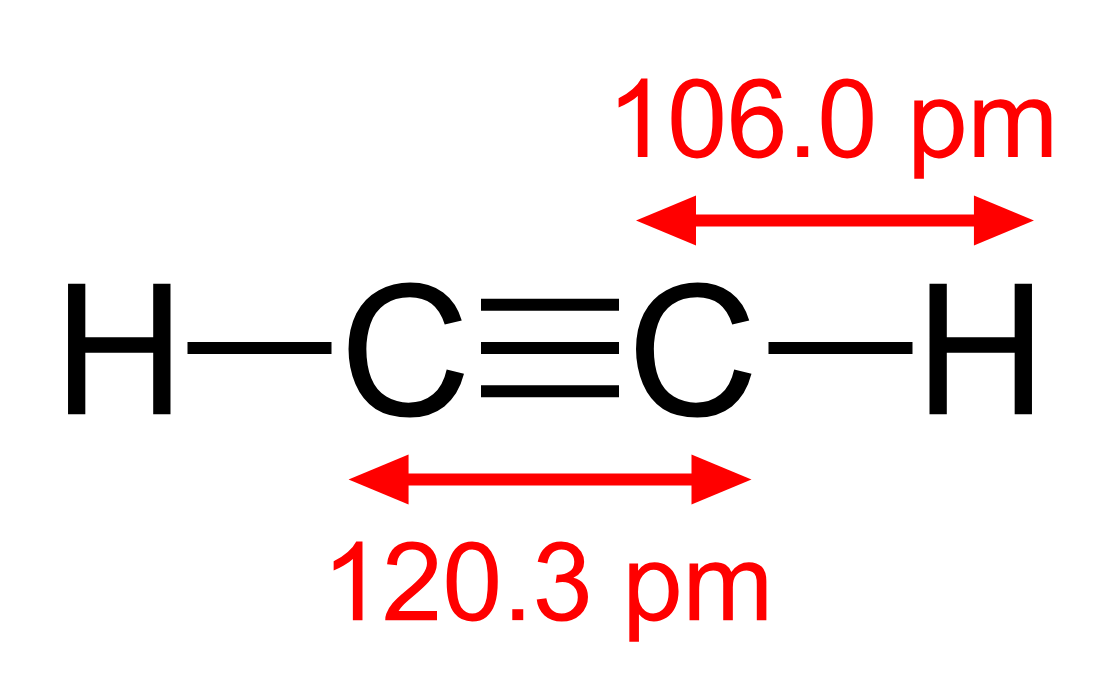

In [145]:
#create undirected graph and add nodes and edges
G2 = nx.Graph()

G2.add_nodes_from([(1, {"atom":"H"}),
                  (2, {"atom":"C"}),
                  (3, {"atom":"C"}),
                  (4, {"atom":"H"})])

G2.add_edges_from([(1, 2),(2, 3),(3, 4)])
A2 = np.asarray(nx.adjacency_matrix(G1).todense())
print(A2) #print adjacency matrix

[[0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [1 1 1 0]]


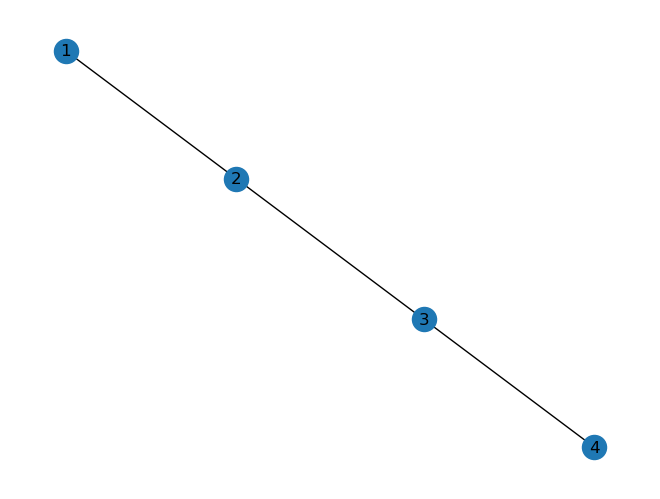

In [56]:
nx.draw(G2, with_labels=True)

In [48]:
mapping_dict2 = {"H": 0, "C": 1}

In [49]:
X2 = build_graph_color_label_representation(G2, mapping_dict2)

print("one hot matrix")
print(X2)

one hot ids [0 1 1 0]
one hot matrix
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


## graph 3, G3 5 nodes, aluminum oxide

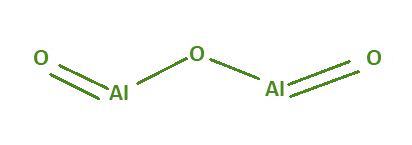

In [146]:
#create undirected graph and add nodes and edges
G3 = nx.Graph()

G3.add_nodes_from([(1, {"atom":"O"}),
                  (2, {"atom":"Al"}),
                  (3, {"atom":"O"}),
                  (4, {"atom":"Al"}),
                  (5, {"atom":"O"})])

G3.add_edges_from([(1, 2),(2, 3),(3, 4), (4, 5)])
A3 = np.asarray(nx.adjacency_matrix(G3).todense())
print("adjacency matrix")
print(A3) #print adjacency matrix



adjacency matrix
[[0 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [0 0 0 1 0]]


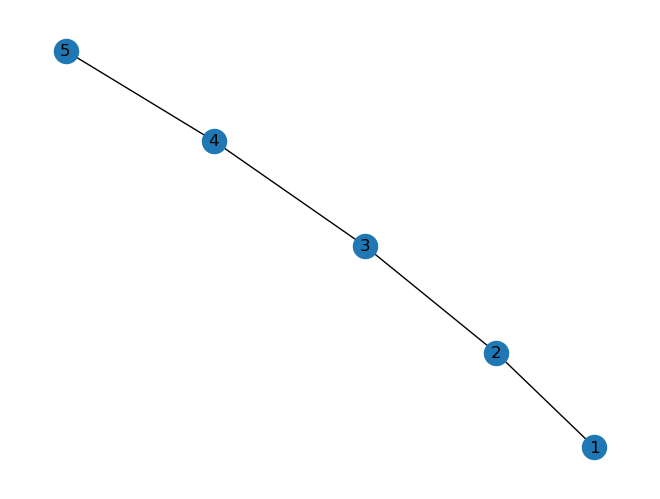

In [59]:
nx.draw(G3, with_labels=True)



In [65]:
mapping_dict3 = {"O": 0, "Al": 1}

X3 = build_graph_color_label_representation(G3, mapping_dict3)

print("one hot matrix")
print(X3)

one hot ids [0 1 0 1 0]
one hot matrix
[[1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]]


## graph 4, 6 nodes, ammonium chloride

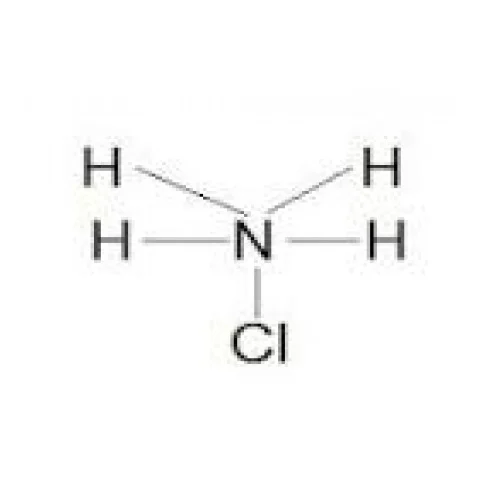

In [147]:
#create undirected graph and add nodes and edges
G4 = nx.Graph()

G4.add_nodes_from([(1, {"atom":"H"}),
                  (2, {"atom":"H"}),
                  (3, {"atom":"Cl"}),
                  (4, {"atom":"H"}),
                  (5, {"atom":"H"}),
                  (6, {"atom":"N"})])

G4.add_edges_from([(1, 6),(2, 6),(3, 6), (4, 6), (5,6)])
A4 = np.asarray(nx.adjacency_matrix(G4).todense())
print("adjacency matrix")
print(A4) #print adjacency matrix



adjacency matrix
[[0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [1 1 1 1 1 0]]


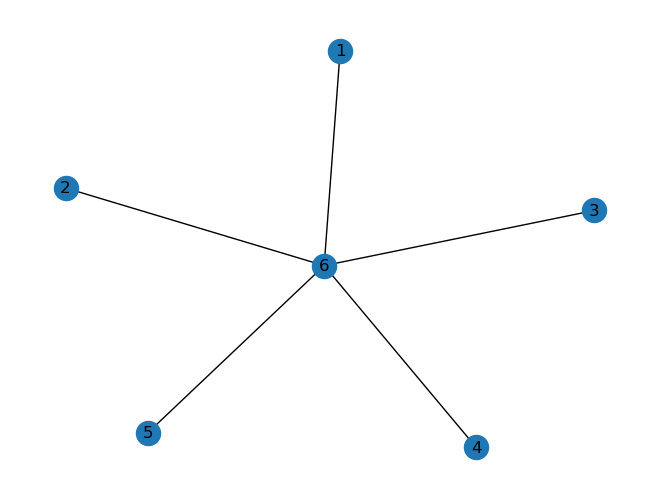

In [62]:
nx.draw(G4, with_labels=True)

In [64]:
mapping_dict4 = {"H": 0, "Cl": 1, "N":2}

X4 = build_graph_color_label_representation(G4, mapping_dict4)

print("one hot matrix")
print(X4)

one hot ids [0 0 1 0 0 2]
one hot matrix
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


## Graph 5, G5, 6 nodes, antimony chloride 

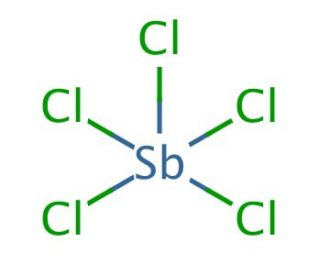

In [148]:
#create undirected graph and add nodes and edges
G5 = nx.Graph()

G5.add_nodes_from([(1, {"atom":"Cl"}),
                  (2, {"atom":"Cl"}),
                  (3, {"atom":"Cl"}),
                  (4, {"atom":"Cl"}),
                  (5, {"atom":"Cl"}),
                  (6, {"atom":"Sb"})])

G5.add_edges_from([(1, 6),(2, 6),(3, 6), (4, 6), (5,6)])
A5 = np.asarray(nx.adjacency_matrix(G5).todense())
print("adjacency matrix")
print(A5) #print adjacency matrix



adjacency matrix
[[0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [0 0 0 0 0 1]
 [1 1 1 1 1 0]]


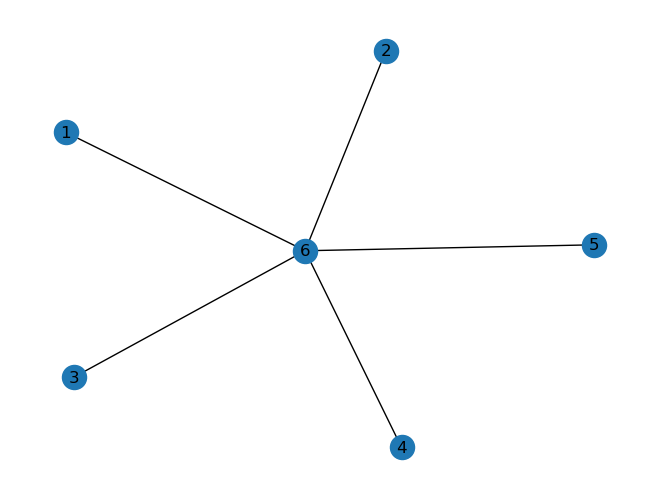

In [68]:
nx.draw(G5, with_labels=True)

In [69]:
mapping_dict5 = {"Cl": 0, "Sb": 1}

X5 = build_graph_color_label_representation(G5, mapping_dict5)

print("one hot matrix")
print(X5)

one hot ids [0 0 0 0 0 1]
one hot matrix
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


## Graph 6, 5 nodes, nitric acid

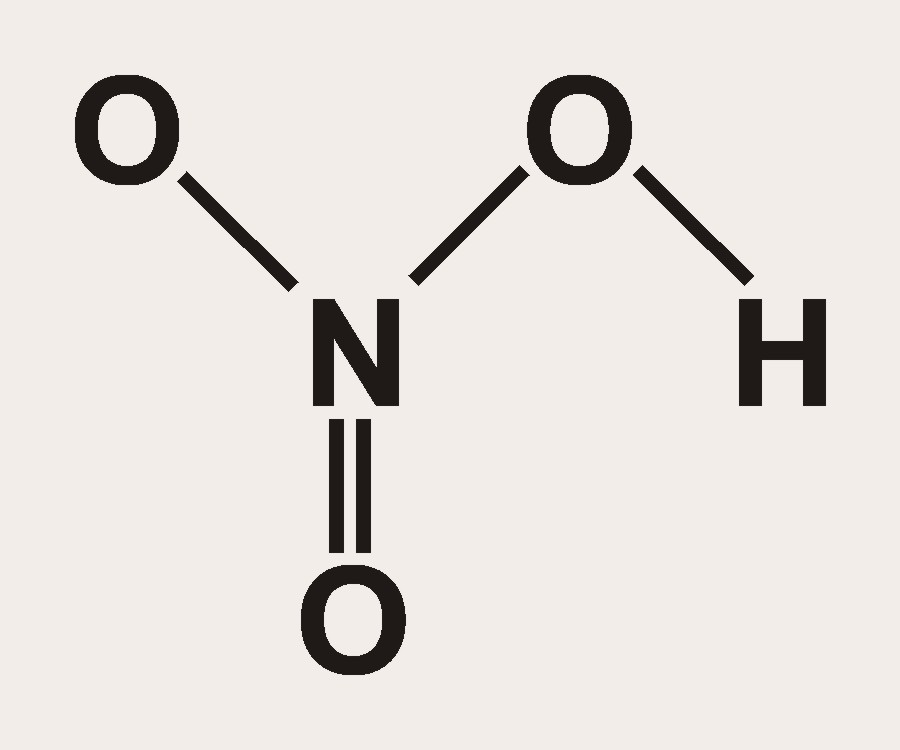

In [149]:
#create undirected graph and add nodes and edges
G6 = nx.Graph()

G6.add_nodes_from([(1, {"atom":"O"}),
                  (2, {"atom":"N"}),
                  (3, {"atom":"O"}),
                  (4, {"atom":"O"}),
                  (5, {"atom":"H"})])

G6.add_edges_from([(1, 2),(2, 3),(2, 4), (4, 5)])
A6 = np.asarray(nx.adjacency_matrix(G3).todense())
print("adjacency matrix")
print(A6) #print adjacency matrix



adjacency matrix
[[0 1 0 0 0]
 [1 0 1 0 0]
 [0 1 0 1 0]
 [0 0 1 0 1]
 [0 0 0 1 0]]


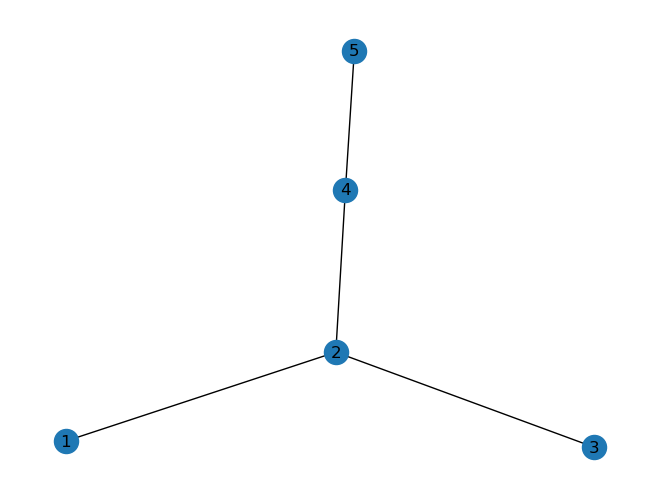

In [95]:
nx.draw(G6, with_labels=True)

In [96]:
mapping_dict6 = {"O": 0, "N": 1, "H":2}

X6 = build_graph_color_label_representation(G6, mapping_dict6)

print("one hot matrix")
print(X6)

one hot ids [0 1 0 0 2]
one hot matrix
[[1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


In [105]:
# # Add Graph Labels

# G1.graph['y'] = 1
# G2.graph['y'] = 0
# G3.graph['y'] = 0
# G4.graph['y'] = 1
# G5.graph['y'] = 0
# G6.graph['y'] = 1

In [104]:
# #add graph adjacency matrices

# G1.graph['A'] = A1
# G2.graph['A'] = A2
# G3.graph['A'] = A3
# G4.graph['A'] = A4
# G5.graph['A'] = A5
# G6.graph['A'] = A6

In [103]:
# #add graph one hot encodings

# G1.graph['X'] = X1
# G2.graph['X'] = X2
# G3.graph['X'] = X3
# G4.graph['X'] = X4
# G5.graph['X'] = X5
# G6.graph['X'] = X6

## Package version checks

Add folder to path in order to load from the check_packages.py script:

In [1]:
import sys
sys.path.insert(0, '..')

Check recommended package versions:

In [70]:
import networkx as nx
import numpy as np
dir(nx)
print(nx.__version__)

3.2.1


## Implementing a GNN in PyTorch from scratch

### Defining the NodeNetwork model

In [71]:
import networkx as nx
import torch
from torch.nn.parameter import Parameter
import numpy as np
import torch.nn.functional as F

In [72]:
class NodeNetwork(torch.nn.Module):

    def __init__(self, input_features):
        super().__init__()
        
        self.conv_1 = BasicGraphConvolutionLayer(input_features, 32)
        self.conv_2 = BasicGraphConvolutionLayer(32, 32)
        self.fc_1 = torch.nn.Linear(32, 16)
        self.out_layer = torch.nn.Linear(16, 2)
    
    def forward(self, X, A,batch_mat):
        x = self.conv_1(X, A).clamp(0)
        x = self.conv_2(x, A).clamp(0)
        output = global_sum_pool(x, batch_mat)
        output = self.fc_1(output)
        output = self.out_layer(output)
        return F.softmax(output, dim=1)

### Coding the NodeNetwork’s graph convolution layer

In [73]:
class BasicGraphConvolutionLayer(torch.nn.Module):

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        
        self.W2 = Parameter(torch.rand(
             (in_channels, out_channels), dtype=torch.float32))
        self.W1 = Parameter(torch.rand(
             (in_channels, out_channels), dtype=torch.float32))
         
        self.bias = Parameter(torch.zeros(
                 out_channels, dtype=torch.float32))
    
    def forward(self, X, A):
        potential_msgs = torch.mm(X, self.W2)
        propagated_msgs = torch.mm(A, potential_msgs)
        root_update = torch.mm(X, self.W1)
        output = propagated_msgs + root_update + self.bias
        return output

In [161]:
print('X.shape:', X.shape)
print('A.shape:', A.shape)

X.shape: (4, 3)
A.shape: (4, 4)


In [160]:
basiclayer = BasicGraphConvolutionLayer(3, 8)
out = basiclayer(
    X=torch.tensor(X, dtype=torch.float32),
    A=torch.tensor(A, dtype=torch.float32)
)

In [158]:
print("Output shape: ", out.shape)

Output shape:  torch.Size([4, 8])


### Adding a global pooling layer to deal with varying graph sizes

In [87]:
def global_sum_pool(X, batch_mat):
    if batch_mat is None or batch_mat.dim() == 1:
        return torch.sum(X, dim=0).unsqueeze(0)
    else:
        return torch.mm(batch_mat, X)

In [88]:
def get_batch_tensor(graph_sizes):
    starts = [sum(graph_sizes[:idx]) for idx in range(len(graph_sizes))]
    stops = [starts[idx]+graph_sizes[idx] for idx in range(len(graph_sizes))]
    tot_len = sum(graph_sizes)
    batch_size = len(graph_sizes)
    batch_mat = torch.zeros([batch_size, tot_len]).float()
    for idx, starts_and_stops in enumerate(zip(starts, stops)):
        start = starts_and_stops[0]
        stop = starts_and_stops[1]
        batch_mat[idx, start:stop] = 1
    return batch_mat

In [89]:
def collate_graphs(batch):
    adj_mats = [graph['A'] for graph in batch]
    sizes = [A.size(0) for A in adj_mats]
    tot_size = sum(sizes)
    # create batch matrix
    batch_mat = get_batch_tensor(sizes)
    # combine feature matrices
    feat_mats = torch.cat([graph['X'] for graph in batch],dim=0)
    # combine labels
    labels = torch.cat([graph['y'] for graph in batch], dim=0)
    # combine adjacency matrices
    batch_adj = torch.zeros([tot_size, tot_size], dtype=torch.float32)
    accum = 0
    for adj in adj_mats:
        g_size = adj.shape[0]
        batch_adj[accum:accum+g_size, accum:accum+g_size] = adj
        accum = accum + g_size
    repr_and_label = {
            'A': batch_adj, 
            'X': feat_mats,
            'y': labels,
            'batch' : batch_mat}

    return repr_and_label

### Preparing the DataLoader

In [178]:
def get_graph_dict(G, mapping_dict):
    # build dictionary representation of graph G
    A = torch.from_numpy(np.asarray(nx.adjacency_matrix(G).todense())).float()
    # build_graph_color_label_representation() was introduced with the first example graph
    X = torch.from_numpy(build_graph_color_label_representation(G,mapping_dict)).float()
    # kludge since there is not specific task for this example
    y = torch.tensor([[1, 0]]).float()
    return {'A': A, 'X': X, 'y': y, 'batch': None}
    
# building 4 graphs to treat as a dataset

# blue, orange, green = "#1f77b4", "#ff7f0e","#2ca02c"
mapping_dict = {"O": 0, "N": 1, "H": 2, "C":3, "Al":4, "Cl":5, "Sb":6}

graph_list = [get_graph_dict(graph,mapping_dict) for graph in [G1, G2, G3, G4, G5, G6]]

In [179]:
print(graph_list)

[{'A': tensor([[0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [0., 0., 0., 1.],
        [1., 1., 1., 0.]]), 'X': tensor([[0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.]]), 'y': tensor([[1., 0.]]), 'batch': None}, {'A': tensor([[0., 1., 0., 0.],
        [1., 0., 1., 0.],
        [0., 1., 0., 1.],
        [0., 0., 1., 0.]]), 'X': tensor([[0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0.]]), 'y': tensor([[1., 0.]]), 'batch': None}, {'A': tensor([[0., 1., 0., 0., 0.],
        [1., 0., 1., 0., 0.],
        [0., 1., 0., 1., 0.],
        [0., 0., 1., 0., 1.],
        [0., 0., 0., 1., 0.]]), 'X': tensor([[1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0.]]), 'y': tensor([[1., 0.

In [180]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


class ExampleDataset(Dataset):
    
    # Simple PyTorch dataset that will use our list of graphs
    def __init__(self, graph_list):
        self.graphs = graph_list
        
    def __len__(self):
        return len(self.graphs)
    
    def __getitem__(self,idx):
        mol_rep = self.graphs[idx]
        return mol_rep

In [208]:
#create data loader with custom collate function
dset = ExampleDataset(graph_list)
loader = DataLoader(dset, batch_size=2, shuffle=False, collate_fn=collate_graphs)

In [187]:
torch.manual_seed(123)
node_features = 7
net = NodeNetwork(node_features)

In [190]:
#check size of the loader
print(len(loader.dataset))

6


In [209]:
#show number of batches
print(len(loader))

3


In [213]:
batch_results = []

#feed all mini batches into the net

for b in loader:
    batch_results.append(net(b['X'], b['A'], b['batch']).detach())

In [214]:
print(batch_results)

[tensor([[0.9798, 0.0202],
        [0.9163, 0.0837]]), tensor([[9.9949e-01, 5.0863e-04],
        [8.6855e-01, 1.3145e-01]]), tensor([[0.9971, 0.0029],
        [0.9954, 0.0046]])]
